In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('bag.png')

In [5]:
type(image)

numpy.ndarray

In [6]:
image.shape

(250, 189, 3)

In [7]:
image.max()

255

In [8]:
image.min()

0

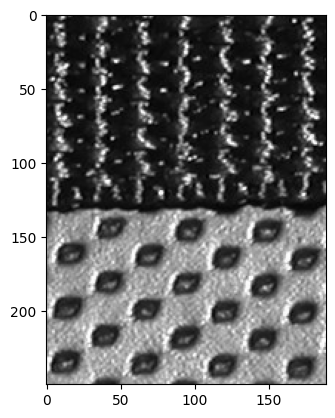

In [9]:
plt.imshow(image)
plt.show()

In [10]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

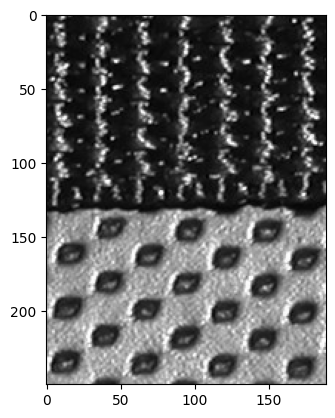

In [11]:
plt.imshow(new_image)
plt.show()

In [12]:
new_image.shape

(250, 189, 3)

In [13]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

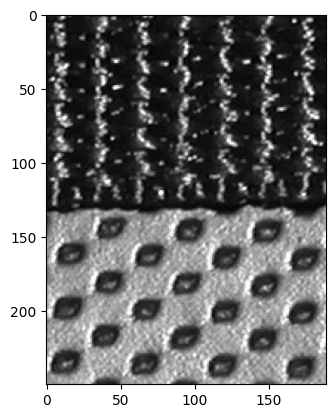

In [18]:
plt.imshow(image_gray, cmap='gray')
plt.show()

In [19]:
image_gray.shape

(250, 189)

In [20]:
cv2.imwrite('bag_gray_cv.png', image_gray)

True

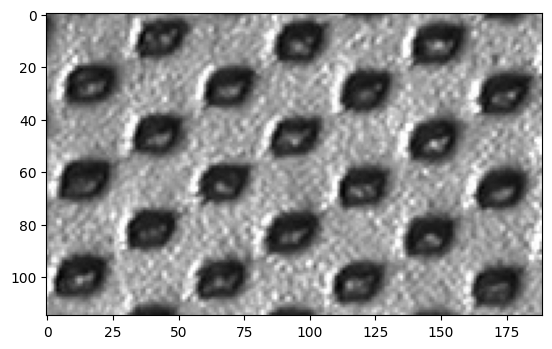

In [132]:
plt.imshow(image_gray[135:,:], cmap='gray')
plt.show()

In [230]:
image_gray_crop = image_gray[138:,3:]

In [231]:
image_gray_crop

array([[104, 127, 153, ..., 132, 154, 155],
       [ 98, 131, 145, ..., 132, 168, 173],
       [101, 129, 138, ..., 132, 161, 170],
       ...,
       [154, 156, 161, ..., 179, 190, 168],
       [149, 146, 148, ..., 179, 191, 174],
       [145, 136, 127, ..., 159, 159, 161]], dtype=uint8)

In [282]:
(thresh, blackAndWhiteImage) = cv2.threshold(image_gray_crop, 85, 255, cv2.THRESH_BINARY)

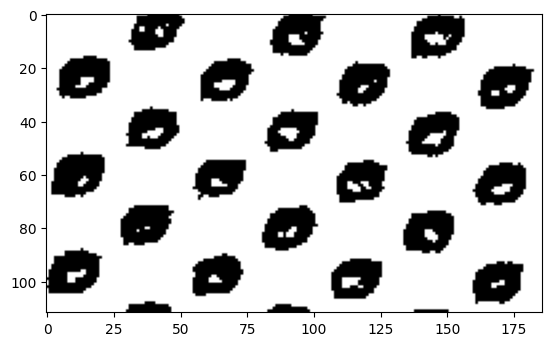

In [283]:
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()

In [284]:
def isInSet(checkValue, minValue, maxValue):
    return checkValue >= minValue and checkValue <= maxValue

In [285]:
isInSet(10, 0, 20)

True

In [286]:
def fourAdjacency(picture):
    # m = #row , n = #column
    m, n = picture.shape
    # create Label matrix
    label = np.zeros((m+1, n+1), dtype=int)
    label_num = 1
    for i in range(m):
        for j in range(n):
            #if isInSet(picture[i,j], 85, 255):
            if picture[i,j] == 0:
                if label[i+1, j] != 0: # check left
                    label[i+1,j+1] = label[i+1,j] # adjacent to left
                elif label[i,j+1] != 0: # check top
                    label[i+1,j+1] = label[i,j+1] # adjacent to top
                else: # no neighbors
                    label[i+1,j+1] = label_num # create new label
                    label_num += 1
    return label[1:,1:]

In [303]:
fourAdjacency(blackAndWhiteImage)[60]

array([  0,   0,   0, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
       101, 101, 101, 101, 101, 101, 101, 101,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 107, 107, 107, 107, 107, 107, 107,
       107, 107, 107, 107, 107, 107, 107, 107, 107, 107,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 105, 105, 105, 105, 105,
       105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105,   

In [300]:
fourAdjacency(blackAndWhiteImage).max()

177

In [291]:
def labelToColor(label):
    m, n = label.shape
    color = np.zeros((m,n,3), dtype=int)
    for i in range(m):
        for j in range(n):
            if label[i,j] == 0:
                color[i,j,:] = 0
            elif label[i,j] == 1:
                color[i,j,0] = 255
                color[i,j,1] = 0
                color[i,j,2] = 0
            elif label[i,j] == 2:
                color[i,j,0] = 0
                color[i,j,1] = 255
                color[i,j,2] = 0
            elif label[i,j] == 3:
                color[i,j,0] = 0
                color[i,j,1] = 0
                color[i,j,2] = 255
            else:
                color[i,j,0] = 255
                color[i,j,1] = 0
                color[i,j,2] = 255
                
    return color             

In [292]:
labelToColor(fourAdjacency(blackAndWhiteImage))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

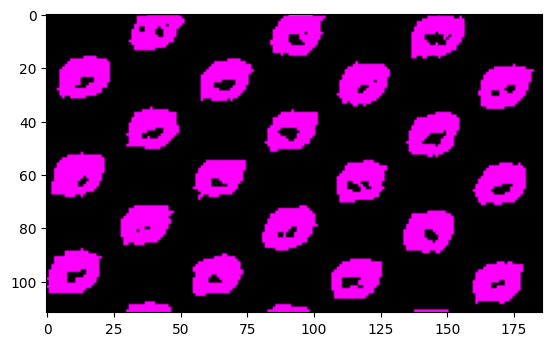

In [293]:
plt.imshow(labelToColor(fourAdjacency(blackAndWhiteImage)))
plt.show()